# CIFAR-100 Dataset: Image Classification
## Nick Cantalupa and Sean Duffy
In this project, we will be training 4 seperate models useing different supervised machine learning techniques. These models will be classifying images using a dataset of 60,000 training images. 

## Loading dataset

In [1]:
import torch
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
ROOT_PATH = 'data'

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR100(root=ROOT_PATH, download=True, train=True, transform=transform)
eval_dataset = CIFAR100(root=ROOT_PATH, train=False, transform=transform)

train_data_loader = DataLoader(dataset=train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
eval_data_loader = DataLoader(dataset=eval_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [3]:
import json

with open('data/cifar-100-python/meta', 'rb') as file:
    meta = pickle.load(file)

with open("labels.json", 'w') as mf:
    json.dump(meta, mf)

## Code below has bugs

In [4]:
label_mapper = {}
for i , label in enumerate(meta["fine_label_names"], 1):
    label_mapper[i] = label
label_mapper

{1: 'apple',
 2: 'aquarium_fish',
 3: 'baby',
 4: 'bear',
 5: 'beaver',
 6: 'bed',
 7: 'bee',
 8: 'beetle',
 9: 'bicycle',
 10: 'bottle',
 11: 'bowl',
 12: 'boy',
 13: 'bridge',
 14: 'bus',
 15: 'butterfly',
 16: 'camel',
 17: 'can',
 18: 'castle',
 19: 'caterpillar',
 20: 'cattle',
 21: 'chair',
 22: 'chimpanzee',
 23: 'clock',
 24: 'cloud',
 25: 'cockroach',
 26: 'couch',
 27: 'crab',
 28: 'crocodile',
 29: 'cup',
 30: 'dinosaur',
 31: 'dolphin',
 32: 'elephant',
 33: 'flatfish',
 34: 'forest',
 35: 'fox',
 36: 'girl',
 37: 'hamster',
 38: 'house',
 39: 'kangaroo',
 40: 'keyboard',
 41: 'lamp',
 42: 'lawn_mower',
 43: 'leopard',
 44: 'lion',
 45: 'lizard',
 46: 'lobster',
 47: 'man',
 48: 'maple_tree',
 49: 'motorcycle',
 50: 'mountain',
 51: 'mouse',
 52: 'mushroom',
 53: 'oak_tree',
 54: 'orange',
 55: 'orchid',
 56: 'otter',
 57: 'palm_tree',
 58: 'pear',
 59: 'pickup_truck',
 60: 'pine_tree',
 61: 'plain',
 62: 'plate',
 63: 'poppy',
 64: 'porcupine',
 65: 'possum',
 66: 'rabbit'

In [8]:
for data, label in train_data_loader:
    print(data)
    print(label)
    break

tensor([[[[-0.4510, -0.4902, -0.4824,  ..., -0.3569, -0.3882, -0.4118],
          [-0.2941, -0.4431, -0.5216,  ..., -0.5137, -0.5608, -0.5608],
          [-0.3804, -0.3647, -0.3255,  ..., -0.5922, -0.6471, -0.6078],
          ...,
          [ 0.1529,  0.1922,  0.0510,  ..., -0.5843, -0.4196, -0.4118],
          [ 0.2078, -0.0196,  0.0667,  ..., -0.3804, -0.4353, -0.4980],
          [-0.0196, -0.0353,  0.2941,  ...,  0.1843,  0.0431, -0.2471]],

         [[-0.4902, -0.5294, -0.5216,  ..., -0.2392, -0.2627, -0.3490],
          [-0.4118, -0.5137, -0.5608,  ..., -0.4275, -0.4510, -0.5137],
          [-0.5294, -0.4824, -0.4196,  ..., -0.5608, -0.5843, -0.6157],
          ...,
          [-0.0824, -0.0510, -0.1922,  ..., -0.6000, -0.4510, -0.4745],
          [-0.0353, -0.2941, -0.2314,  ..., -0.3647, -0.5059, -0.6000],
          [-0.2549, -0.2941,  0.0039,  ...,  0.1451, -0.0902, -0.4118]],

         [[-0.5922, -0.6235, -0.6157,  ..., -0.5608, -0.5608, -0.5608],
          [-0.5373, -0.6078, -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


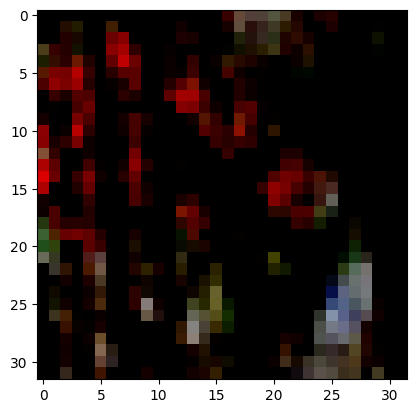

flatfish


In [42]:
i = 2
data[i,:].shape
img = data[i, :].permute(1,2,0)
plt.imshow(img)
plt.show()
print(label_mapper[int(label[i])])

In [34]:
label[2]

tensor(33)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([200, 3, 32, 32])
Labels batch shape: torch.Size([200])


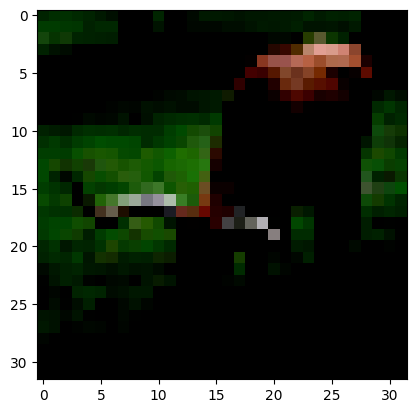

Label: 19, caterpillar


In [5]:
train_features, train_labels = next(iter(train_data_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
label = train_labels[0]
img = img.permute(1, 2, 0)
plt.imshow(img)
plt.show()
print(f"Label: {label}, {label_mapper[int(label)]}")